# Lectura y escritura de archivos en Python
Python, al igual que muchos lenguajes, permite la manipulación de archivos. Permitiendo escribir y leer en estos.


## 1 Archivos y rutas
Primero hay que entender el concepto de rutas o paths.

Todo archivo tiene los atributos de **nombre** y **ruta**. Por ejemplo, un archivo en Windows con nombre project.docx está en C:\Users\Al\Documents.

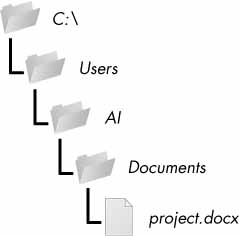

### 1.1 Diferencia entre Unix y Linux
Los sistemas basados en Unix como Mac o las distribuciones Linux usan "/" para escribir las rutas. Mientras que en Windows se utliza "\\".

path en Windows `C:\Users\jsmith\Documents\file.txt`

path en Linux `/home/jsmith/Documents/file.txt`

### 1.2 Path absoluto y path relativo

- Path absoluto: ruta cumpleta desde la raíz hasta el archivo.

- Path relativo: ruta a partir de una carpeta.

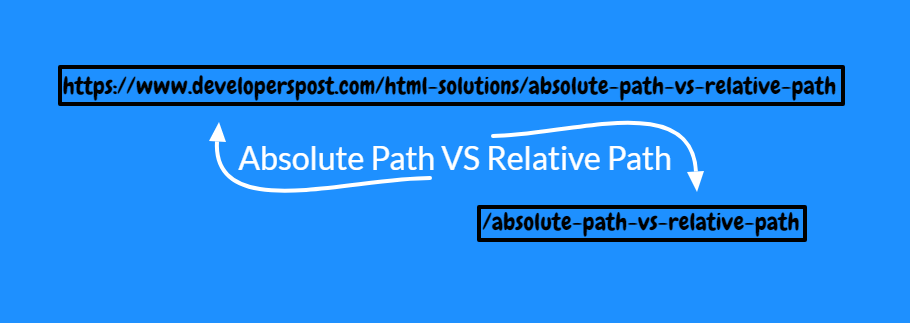

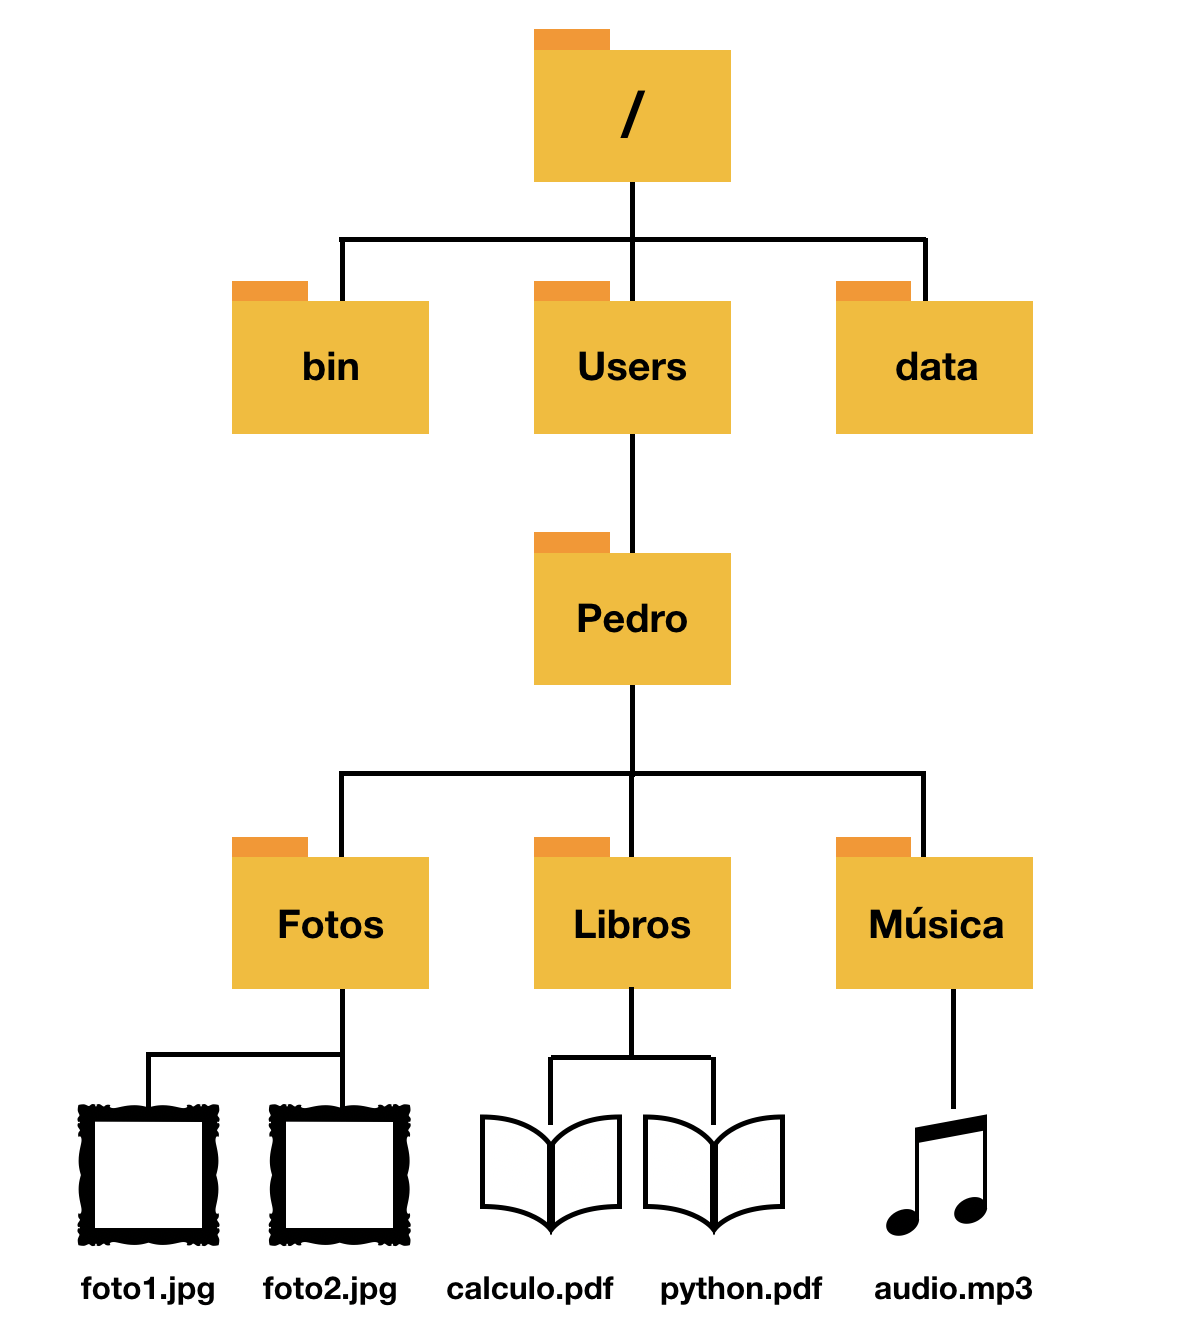
Las formas de acceder a "python.pdf" son:
- "/Users/Pedro/Libros/python.pdf" es la ruta absoluta del archivo, ya que detalla desde el directorio raíz la dirección del archivo. Esta ruta es única, no hay otra ruta absoluta para el archivo.
- "Users/Pedro/Libros/python.pdf" es la ruta relativa del archivo, relativa desde directorio raíz "/".
- "Libros/python.pdf" es la ruta relativa del archivo, relativa desde directorio "/Users/Pedro".
- "python.pdf" es la ruta relativa del archivo, relativa desde directorio "/Users/Pedro/Libros".

## 2 Utilización en Python

Para acceder a un archivo se ocupa la función `open()`

Sintáxis:
```py
    f = open('nombre_archivo', 'permisos')
    # ordenes entre medio
    f.close()
```
Se considera buena practicar cerrar el archivo. Para esto se usa la función `close()`.

## 2.1 Leer un archivo

In [11]:
f = open("archivo.txt", "r")  # "r" nos permite leer
print(f.read())               # read() regresa un string con el contenido del archivo

linea 1
linea 2
linea 3



In [12]:
f = open("archivo.txt", "r")
lineas = f.readlines()        # readlines() regresa una lista con cada linea del archivo
lineas

['linea 1\n', 'linea 2\n', 'linea 3\n']

In [13]:
f = open("archivo.txt", "r")
for linea in f:                   # tambien se puede iterar sobre las lineas de un archivo
  print(linea, end='')

linea 1
linea 2
linea 3


In [14]:
f.close()

## 2.2 Escribir en un archivo

In [15]:
f = open("archivo.txt", "w")  # "w" nos permite sobreescribir un archivo
f.write("escribiendo...")     # write() escribe un archivo
f.close()

In [18]:
f = open("archivo.txt", "a")  # "a" nos permite añadir texto al final de un archivo
f.write("escribiendo...\n")   # write() escribe un archivo
f.close()

## 2.3 Sentencia with
La sentencia with nos permite leer un archivo, asignarlo a una variable y finalmente cerrarlo con sólo una linea.

In [19]:
with open('./archivo.txt', 'r') as archivo:
    lineas = archivo.readlines()
# Acá ya se cerró el archivo
lineas

['escribiendo...escribiendo...\n', 'escribiendo...\n', 'escribiendo...\n']

Cuando se coloca el punto se hace referencia a la ubicación del mismo archivo de ejecución

In [28]:
with open('./carpeta/texto.txt', 'r+') as archivo:
    lineas = archivo.readlines()
# Acá ya se cerró el archivo
lineas

['Lorem ipsum dolor sit amet, consectetur adipiscing elit.\n',
 'Nullam at velit viverra tellus venenatis semper non ut urna.\n',
 'Maecenas sollicitudin libero ut consectetur finibus.\n',
 'Sed vel eros non erat dictum ornare.\n',
 'Cras venenatis lorem in quam dapibus, vitae laoreet orci lobortis.\n',
 'Donec eget purus a justo volutpat vehicula.']

## 2.4 Libería OS
Pero como ya saben la ruta relativa `'./carpeta/texto.txt'` funciona en Linux pero no en Windows. Entonces se genera el problema de tener que hacer código propio para cada sistema, ¿o no?. El módulo `os` nos permite hacer rutas genéricas sin preocuparnos de en qué sistema se correrá el programa. 

Además, trae funcionalidades para navegar por las carpetas del sistema (lo pueden investigar por su cuenta).

In [29]:
import os

In [30]:
path = 'f1/f2/f3'

dirname = os.path.dirname(path)   # regresa el path completo (incluido el archivo)
basename = os.path.basename(path) # regresa el path sin el nombre del archivo

print(f'path: {path}')
print(f'dirname: {dirname}')
print(f'pathname: {basename}')

path: f1/f2/f3
dirname: f1/f2
pathname: f3


In [32]:
ruta = os.path.join(".", "carpeta", "texto.txt")
print(ruta)
with open(ruta, 'rx') as archivo:
    lineas = archivo.read()
# Acá ya se cerró el archivo
print(lineas)

./carpeta/texto.txt
Lorem ipsum dolor sit amet, consectetur adipiscing elit.
Nullam at velit viverra tellus venenatis semper non ut urna.
Maecenas sollicitudin libero ut consectetur finibus.
Sed vel eros non erat dictum ornare.
Cras venenatis lorem in quam dapibus, vitae laoreet orci lobortis.
Donec eget purus a justo volutpat vehicula.
